# Simulación de Sine-Gordon: Comparación entre Solución Numérica y Exacta

Este notebook permite ejecutar programas C++ y visualizar los resultados en Python.

## Estructura del proyecto
- `main.cpp`: Simulación numérica usando diferencias finitas
- `solucion_exacta.cpp`: Cálculo de la solución analítica del kink viajero
- Este notebook: Ejecuta ambos y compara resultados

## Marco Teórico


La ecuación de Sine-Gordon en dos dimensiones espaciales y una temporal es:

$$
\frac{\partial^2 \phi}{\partial t^2} - \frac{\partial^2 \phi}{\partial x^2} - \frac{\partial^2 \phi}{\partial y^2} + \sin(\phi) = 0
$$


Esta ecuación es usada en física y matemáticas para describir fenómenos no lineales en medios continuos. Aparece en el estudio de la propagación de ondas en sistemas de transmisión eléctrica, dinámicas de cadenas de átomos, óptica no lineal y teoría de campos. Estos, son fundamentales en el análisis de solitones, pues admite soluciones tipo kink y antikink, que representan partículas o excitaciones estables que pueden interactuar entre sí sin perder su forma.


Las soluciones de dicha ecuación dependerán de las condiciones iniciales, su derivada temporal, las condiciones de frontera, etc... Estos permiten determinar la forma, evolución y estabilidad de las soluciones, permitiendo la aparición de ondas, solitones, kinks, antikinks y otras estructuras.


En la actualidad existen diversas formas de solucionar estas fórmulas, más aún existen sistemas en los cuales dicha solución no hay una fórmula analítica. En dichos casos hay que utilizar métodos computacionales para esto. 


Una de las técnicas numéricas más utilizadas para resolver la ecuación de Sine-Gordon es el método de diferencias finitas. Este método consiste en discretizar el dominio espacial y temporal en una malla de puntos, y aproximar las derivadas por diferencias entre los valores de la función en estos puntos.

Por ejemplo, la ecuación de Sine-Gordon en dos dimensiones espaciales y una temporal se puede aproximar como:

$$
\frac{\phi_{i,j}^{n+1} - 2\phi_{i,j}^n + \phi_{i,j}^{n-1}}{(\Delta t)^2} - \frac{\phi_{i+1,j}^n - 2\phi_{i,j}^n + \phi_{i-1,j}^n}{(\Delta x)^2} - \frac{\phi_{i,j+1}^n - 2\phi_{i,j}^n + \phi_{i,j-1}^n}{(\Delta y)^2} + \sin(\phi_{i,j}^n) = 0
$$

Despejando $\phi_{i,j}^{n+1}$, se obtiene el esquema de actualización para cada punto de la malla:

$$
\phi_{i,j}^{n+1} = 2\phi_{i,j}^n - \phi_{i,j}^{n-1} + (\Delta t)^2 \left[ \frac{\phi_{i+1,j}^n - 2\phi_{i,j}^n + \phi_{i-1,j}^n}{(\Delta x)^2} + \frac{\phi_{i,j+1}^n - 2\phi_{i,j}^n + \phi_{i,j-1}^n}{(\Delta y)^2} - \sin(\phi_{i,j}^n) \right]
$$

Este procedimiento se repite para cada paso temporal, utilizando las condiciones iniciales y de frontera apropiadas. Así, es posible simular la evolución de la ecuación y estudiar el comportamiento de las soluciones en diferentes escenarios físicos.

### Problema particular: Kink viajero

En este trabajo se aplicará el método de diferencias finitas a un problema particular cuya solución analítica es conocida: el **kink viajero**. Esta solución exacta está dada por:

$$
\phi(x,t) = 4 \arctan\left(e^{\gamma(x - vt - x_0)}\right)
$$

donde:
- $v$ es la velocidad del kink
- $x_0$ es la posición inicial del kink
- $\gamma = \frac{1}{\sqrt{1-v^2}}$ es el factor de Lorentz

Esta solución representa una onda solitaria que se propaga con velocidad constante $v$ sin cambiar su forma, y es fundamental para validar la precisión del método numérico implementado. La comparación entre la solución numérica y esta solución exacta permite evaluar la calidad de la aproximación y el comportamiento del esquema de diferencias finitas.

## 1. Importar librerías necesarias

In [10]:
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import os

print("Librerías importadas correctamente")

Librerías importadas correctamente


## 2. Compilar programas C++

Compilamos ambos programas directamente desde el notebook.

In [11]:
print("=== Compilando programas C++ ===")

# Compilar simulación numérica
print("\n1. Compilando simulación numérica...")
result = subprocess.run(
    ['g++', '-o', 'simulacion', 'main.cpp', 'condiciones_iniciales.cpp', '-std=c++11', '-O2'],
    capture_output=True, text=True
)
if result.returncode == 0:
    print("   ✓ simulacion compilado")
else:
    print("   ✗ Error compilando simulacion")
    print(result.stderr)
    raise Exception("Error en compilación")

# Compilar solución exacta
print("\n2. Compilando solución exacta...")
result = subprocess.run(
    ['g++', '-o', 'solucion_exacta', 'solucion_exacta.cpp', '-std=c++11', '-O2'],
    capture_output=True, text=True
)
if result.returncode == 0:
    print("   ✓ solucion_exacta compilado")
else:
    print("   ✗ Error compilando solucion_exacta")
    print(result.stderr)
    raise Exception("Error en compilación")

print("\n=== Compilación exitosa ===")

=== Compilando programas C++ ===

1. Compilando simulación numérica...
   ✓ simulacion compilado

2. Compilando solución exacta...
   ✓ solucion_exacta compilado

=== Compilación exitosa ===


## 3. Ejecutar solución exacta y capturar datos

Ejecuta el programa C++ y captura la salida directamente en memoria.

In [12]:
# Ejecutar programa de solución exacta y capturar salida
print("Ejecutando solución exacta...")
result = subprocess.run(['./solucion_exacta'], capture_output=True, text=True)

# Los mensajes informativos van a stderr, los datos a stdout
print(result.stderr)

# Parsear los datos de stdout
lineas = result.stdout.strip().split('\n')
t_exacta = []
phi_exacta = []

for linea in lineas:
    valores = linea.split()
    t_exacta.append(float(valores[0]))
    phi_exacta.append([float(v) for v in valores[1:]])

t_exacta = np.array(t_exacta)
phi_exacta = np.array(phi_exacta)

print(f"\n✓ Datos capturados: {len(t_exacta)} pasos temporales, {phi_exacta.shape[1]} puntos espaciales")

Ejecutando solución exacta...
Generando solución exacta del kink viajero...
Velocidad v = 0.5
Factor gamma = 1.1547
Solución generada.


✓ Datos capturados: 21 pasos temporales, 100 puntos espaciales


## 4. Ejecutar simulación numérica y capturar datos

Ejecuta la simulación usando diferencias finitas y captura los datos directamente.

In [13]:
# Ejecutar simulación numérica y capturar salida
print("Ejecutando simulación numérica...")
result = subprocess.run(['./simulacion'], capture_output=True, text=True)

# Los mensajes informativos van a stderr, los datos a stdout
print(result.stderr)

# Parsear los datos de stdout
lineas = result.stdout.strip().split('\n')
t_numerica = []
phi_numerica = []

for linea in lineas:
    valores = linea.split()
    t_numerica.append(float(valores[0]))
    phi_numerica.append([float(v) for v in valores[1:]])

t_numerica = np.array(t_numerica)
phi_numerica = np.array(phi_numerica)

print(f"\n✓ Datos capturados: {len(t_numerica)} pasos temporales, {phi_numerica.shape[1]} puntos espaciales")

Ejecutando simulación numérica...
Paso : 0	| Energía : 88.0719	| Carga topológica: 1
Paso : 50	| Energía : 88.8822	| Carga topológica: 1
Paso : 100	| Energía : 89.6576	| Carga topológica: 1
Paso : 150	| Energía : 90.27	| Carga topológica: 1
Paso : 200	| Energía : 90.8386	| Carga topológica: 1
Paso : 250	| Energía : 91.6578	| Carga topológica: 1
Paso : 300	| Energía : 92.7745	| Carga topológica: 1
Paso : 350	| Energía : 93.9825	| Carga topológica: 1
Paso : 400	| Energía : 95.0541	| Carga topológica: 1
Paso : 450	| Energía : 95.9026	| Carga topológica: 1
Paso : 500	| Energía : 96.5349	| Carga topológica: 1
Paso : 550	| Energía : 96.9926	| Carga topológica: 1
Paso : 600	| Energía : 97.5166	| Carga topológica: 1
Paso : 650	| Energía : 97.2219	| Carga topológica: 1
Paso : 700	| Energía : 96.3828	| Carga topológica: 1
Paso : 750	| Energía : 95.7257	| Carga topológica: 0.999999
Paso : 800	| Energía : 95.1875	| Carga topológica: 0.999998
Paso : 850	| Energía : 94.4141	| Carga topológica: 1
Pas

## 5. Preparar malla espacial para visualización

In [14]:
# Crear malla espacial (asumiendo parámetros del código C++)
Nx = phi_exacta.shape[1]
Lx = 40.0  # Ajusta según parametros.h
x = np.linspace(-Lx/2, Lx/2, Nx)

print(f"Resumen de datos:")
print(f"  - Solución exacta: {len(t_exacta)} pasos temporales")
print(f"  - Solución numérica: {len(t_numerica)} pasos temporales")
print(f"  - Puntos espaciales: {Nx}")
print(f"  - Dominio espacial: [{x[0]:.2f}, {x[-1]:.2f}]")
print(f"  - Tiempo simulado: [0, {t_exacta[-1]:.2f}]")

Resumen de datos:
  - Solución exacta: 21 pasos temporales
  - Solución numérica: 20 pasos temporales
  - Puntos espaciales: 100
  - Dominio espacial: [-20.00, 20.00]
  - Tiempo simulado: [0, 20.00]


## 6. Visualización: Comparación en diferentes tiempos

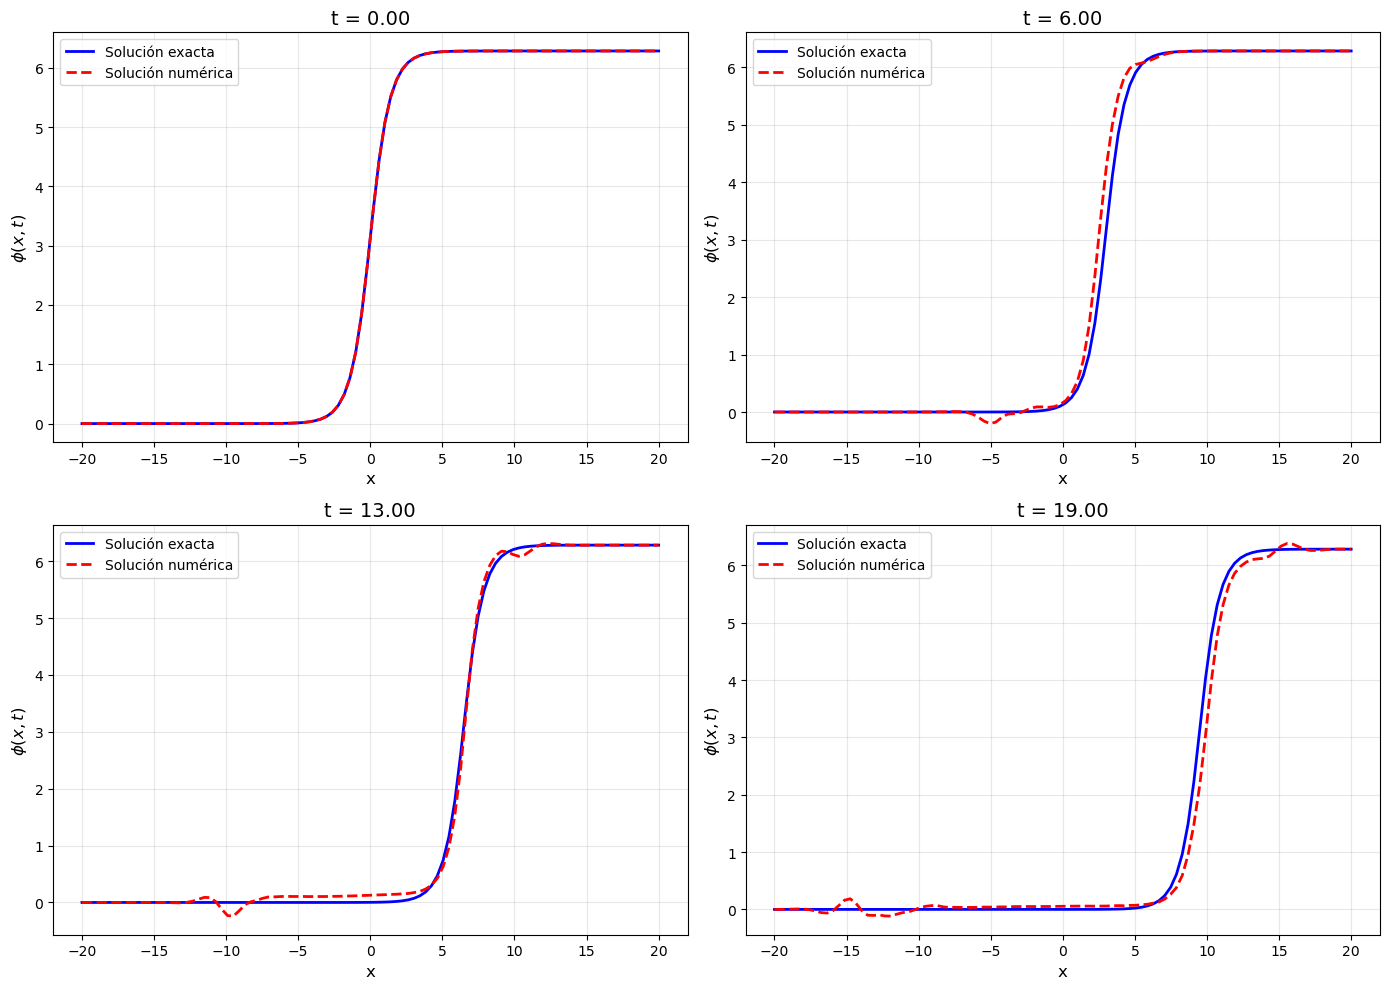

In [15]:
# Graficar comparación para varios tiempos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Usar el mínimo de pasos entre ambas soluciones
n_pasos = min(len(t_exacta), len(t_numerica))
indices_tiempo = [0, n_pasos//3, 2*n_pasos//3, n_pasos-1]

for idx, t_idx in enumerate(indices_tiempo):
    ax = axes[idx]
    ax.plot(x, phi_exacta[t_idx], 'b-', linewidth=2, label='Solución exacta')
    ax.plot(x, phi_numerica[t_idx], 'r--', linewidth=2, label='Solución numérica')
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel(r'$\phi(x,t)$', fontsize=12)
    ax.set_title(f't = {t_exacta[t_idx]:.2f}', fontsize=14)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Cálculo del error entre soluciones

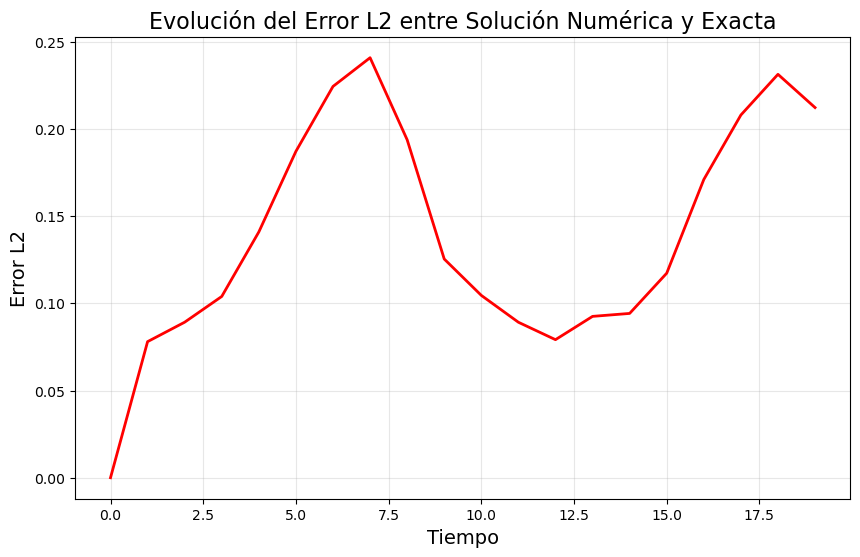

Error L2 inicial: 0.000000
Error L2 final: 0.212277
Incremento de error: 0.212277


In [16]:
# Calcular error L2 en función del tiempo
# Usar el mínimo de pasos entre ambas soluciones
n_pasos = min(len(t_exacta), len(t_numerica))
errores_L2 = []
for i in range(n_pasos):
    error = np.sqrt(np.mean((phi_numerica[i] - phi_exacta[i])**2))
    errores_L2.append(error)

# Graficar evolución del error
plt.figure(figsize=(10, 6))
plt.plot(t_exacta[:n_pasos], errores_L2, 'r-', linewidth=2)
plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Error L2', fontsize=14)
plt.title('Evolución del Error L2 entre Solución Numérica y Exacta', fontsize=16)
plt.grid(True, alpha=0.3)
plt.show()

print(f"Error L2 inicial: {errores_L2[0]:.6f}")
print(f"Error L2 final: {errores_L2[-1]:.6f}")
print(f"Incremento de error: {errores_L2[-1] - errores_L2[0]:.6f}")

## 8. Animación de la evolución temporal

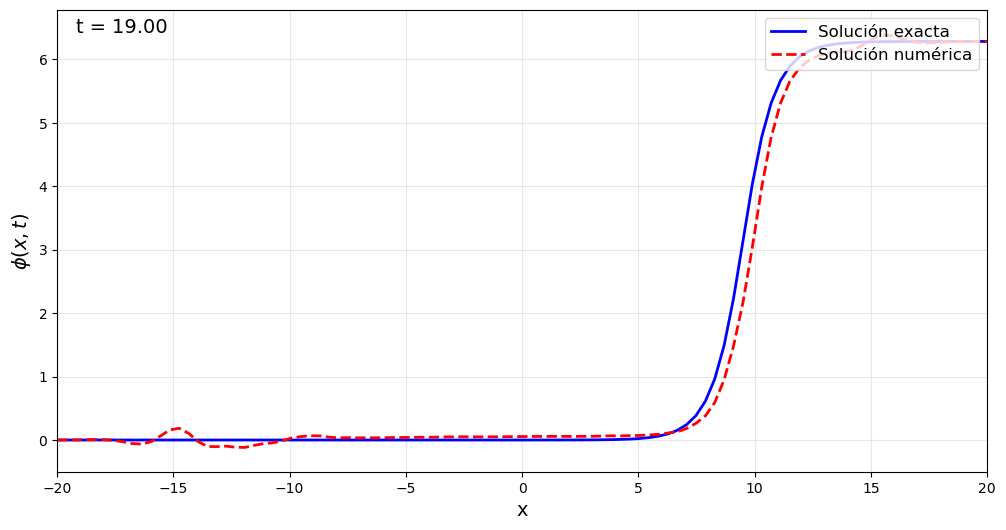

In [17]:
# Crear animación
# Usar el mínimo de pasos entre ambas soluciones
n_pasos = min(len(t_exacta), len(t_numerica))

fig, ax = plt.subplots(figsize=(12, 6))

line_exacta, = ax.plot([], [], 'b-', linewidth=2, label='Solución exacta')
line_numerica, = ax.plot([], [], 'r--', linewidth=2, label='Solución numérica')

ax.set_xlim(x.min(), x.max())
ax.set_ylim(phi_exacta[:n_pasos].min()-0.5, phi_exacta[:n_pasos].max()+0.5)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel(r'$\phi(x,t)$', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ax.grid(True, alpha=0.3)

time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=14)

def init():
    line_exacta.set_data([], [])
    line_numerica.set_data([], [])
    time_text.set_text('')
    return line_exacta, line_numerica, time_text

def animate(i):
    line_exacta.set_data(x, phi_exacta[i])
    line_numerica.set_data(x, phi_numerica[i])
    time_text.set_text(f't = {t_exacta[i]:.2f}')
    return line_exacta, line_numerica, time_text

anim = FuncAnimation(fig, animate, init_func=init, frames=n_pasos, interval=200, blit=True)

# Mostrar animación en el notebook
HTML(anim.to_jshtml())

## 9. Resumen estadístico

In [18]:
# Crear tabla resumen
# Usar el mínimo de pasos entre ambas soluciones
n_pasos = min(len(t_exacta), len(t_numerica))

resumen = pd.DataFrame({
    'Tiempo': t_exacta[:n_pasos],
    'Error L2': errores_L2,
    'Error Máximo': [np.max(np.abs(phi_numerica[i] - phi_exacta[i])) for i in range(n_pasos)],
    'Error Promedio': [np.mean(np.abs(phi_numerica[i] - phi_exacta[i])) for i in range(n_pasos)]
})

print("\nResumen de errores:")
print(resumen.to_string(index=False))


Resumen de errores:
 Tiempo  Error L2  Error Máximo  Error Promedio
    0.0  0.000000      0.000000        0.000000
    1.0  0.078041      0.403383        0.026327
    2.0  0.089195      0.354830        0.034862
    3.0  0.103959      0.524470        0.035905
    4.0  0.140955      0.712620        0.049228
    5.0  0.187174      0.903890        0.066261
    6.0  0.224406      1.082600        0.078270
    7.0  0.240870      1.056890        0.109176
    8.0  0.193812      0.755980        0.095920
    9.0  0.125424      0.528720        0.062628
   10.0  0.104569      0.366800        0.065130
   11.0  0.089163      0.261860        0.057604
   12.0  0.079171      0.242968        0.049471
   13.0  0.092531      0.254460        0.065122
   14.0  0.094225      0.369660        0.061544
   15.0  0.117303      0.546670        0.062523
   16.0  0.171030      0.708810        0.105472
   17.0  0.208013      0.888870        0.106414
   18.0  0.231352      1.083030        0.112319
   19.0  0.212277  

## 10. Conclusiones

- Si el error L2 se mantiene pequeño (< 0.1), la simulación es precisa.
- Si el error crece lentamente, indica dispersión numérica controlada.
- Si el error explota, hay problemas de estabilidad numérica.